In [1]:
from scipy import stats
import numpy as np
import scipy.integrate as integrate
import matplotlib.pyplot as plt
from matplotlib import colors
from IPython.display import Image

# STATISTICAL INFERENCE 1: Regression

the process of deducing properties of an underlying distribution

# Least squares 

In [547]:
# generate some data from quadratic model with Gaussian noise

def true_func(x):
    return (x - 5.0)**2 + 10.

N=20 # number of points
np.random.seed(45)
xmin=0
xmax=20.
x=np.random.uniform(xmin,xmax,size=N)
yclean=true_func(x)
mu=0
sigma=20
noise = stats.norm.rvs(mu, sigma, size = N)
y = yclean + noise

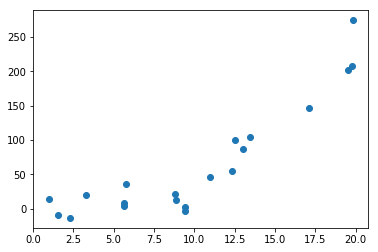

In [548]:
plt.scatter(x,y)
plt.show()

If underlying PDF of data $y$ is i.i.d. as Gaussian, likelihood is: 
$$
{\cal L}(\bf w) = \prod_{i=1}^N  {\cal N}(y_i|\bar{y}_i,\sigma_y)
$$

where 
$$  \bar y_i = \bar y_i({\bf w}) $$

and ${\bf w}$ are the parameters of the machine-learning model.

For a given model, choose the parameters that **maximise** the likelihood (MLE). For Gaussian, equivalent to minimise:
$$
{\rm Cost} = \frac{1}{N}\sum_{i=1}^N \big( y_i - \bar{y}_i({\bf w})\big)^2~~~~~ (\rm MSE)
$$

In [210]:
def Cost(y_obs,y_pred):
    # y_obs: array of observations
    # y_pred: array of predictions
    return np.mean((y_obs-y_pred)**2)

**Machine Learning procedure:**  choose the model for $\bar y(x)$ that best fit **new data**

Assume a basis of functions like 
$$ f(x) = \beta_0 + \sum_{p=1}^P \beta_p x^p = \beta^T\cdot \vec\phi(x)  $$ 

then the result of minimisation can be computed analytically, and is:
$$
\beta_{\rm ML} = (\Phi^T\Phi)^{-1}\Phi^T\cdot {\bf y}~~~~~~~~~~(1)
$$

In [307]:
def Phi(x,P):
    # x: input vector
    # P: order of polynomial
    xt=x.reshape((-1,1))
    Phi=np.ones(len(x)).reshape((-1,1))
    for p in range(1,P+1):
        Phi=np.hstack((Phi,xt**p))
    return Phi


In [233]:
def beta_MSE(Phi,y):
    return np.linalg.inv(np.transpose(Phi).dot(Phi)).dot(np.transpose(Phi)).dot(y)

Idea is to have optimal prediction in data never seen before:
Dataset _randomly_ partitioned into **training** and **test** sets 

In [549]:
# reshuffling data
np.random.seed(124)
perm = np.random.permutation(N)
x=x[perm]
y=y[perm]

#partitioning data
test_size = int(0.2*N)
x_test = x[:test_size]
x_train = x[test_size:]
y_test = y[:test_size]
y_train = y[test_size:]

Let's build the model

In [255]:
def y_pred(Phi,beta):
    # beta: vector of coefficients
    # Phi:  Nx(P+1) matrix of features (inputs)
    return Phi.dot(beta)

For a given model complexity $P$, the training fit is already given by expr.(1) 
evaluated in the training set  (in more complex models, numerical training is needed). The solution for $P=3$ is:

beta_hat= [  8.86896768e+01  -1.25646176e+02   5.85868781e+01  -1.16455553e+01
   1.10529463e+00  -4.90170982e-02   8.18638237e-04]


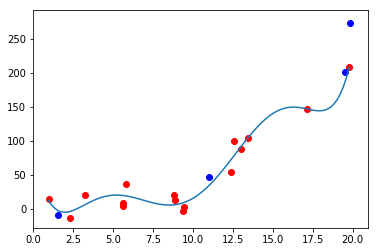

In [561]:
p=6
beta_hat = beta_MSE(Phi(x_train,p),y_train)
print('beta_hat=',beta_hat)
plt.scatter(x_train,y_train,color='red')
plt.scatter(x_test,y_test,color='blue')
x_arr=np.linspace(min(x_train),max(x_train),100)
plt.plot(x_arr,y_pred(Phi(x_arr,p),beta_hat))
plt.show()

Let's evaluate the Cost in the training and in the test sets

In [564]:
error_train=[]
error_test=[]
for p in range(1,5):
    beta_hat = beta_MSE(Phi(x_train,p),y_train)
    y_pred_train = y_pred(Phi(x_train,p),beta_hat)
    y_pred_test = y_pred(Phi(x_test,p),beta_hat)
    error_train.append(Cost(y_train,y_pred_train))
    error_test.append(Cost(y_test,y_pred_test))

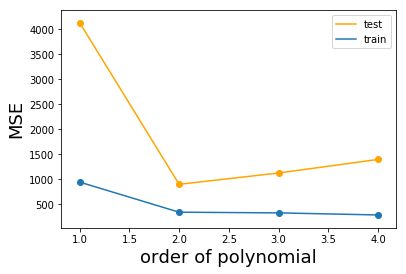

In [575]:
p_arr = np.linspace(1,4,4)
plt.plot(p_arr,error_test,color='orange',label='test')
plt.scatter(p_arr,error_test,color='orange')
plt.plot(p_arr,error_train,label='train')
plt.scatter(p_arr,error_train)
plt.xlabel("order of polynomial",fontsize=18)
plt.ylabel("MSE",fontsize=18)
plt.legend(bbox_to_anchor=(1.,1.))
plt.show()